In [64]:
"""
NOTE:
Before running this, create a virtual environment running
Python 3.12
""" 
# pytorch install, cpu-only
%pip install torch 
%pip install transformers
%pip install sentence-transformers
%pip install pandas
%pip install chonkie
%pip install pypdf[image]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [48]:
from transformers import AutoTokenizer
from sentence_transformers import SentenceTransformer
from sentence_transformers.models import StaticEmbedding
from chonkie import SentenceChunker
from pypdf import PdfReader

In [50]:
# define paths
main = r"C:\Users\sevan\Documents\GitHub\super-search"
data = f"{main}/data/tests"
test_file = f"{data}/32286.pdf"

## To-Do:

### Database management
- We need a system to handle vector database as well as allowing for fast retrieval of the files corresponding to each vector
    - Each file needs a file_id
        - Links to the filepath
    - Each chunk needs a chunk_id
        - Links to the chunk text
            - Importantly, link to the original text, not the processed text used for embedding.
    - file_id + chunk_id should uniquely identify a vector in the database
- After taking a user query and encoding it, perform similarity search in the database
    to identify a row, then link to the row's filepath and text
- Then print a hyperlink to the file, and print the original text
- **Problem**: how to return images, given that we first caption them with an LLM and then encode the caption?

### Incorporating Images
- Use PyPDF to extract images from each page of the PDF.
```
for page in reader.pages:
    try:
        for image in page.images:
            extract_image(image)
    except:
        pass
```
- To render the image visually: image.image. Can also show as bytes
- Goal is to pass each image to a multi-modal LLM for summary, which is then fed into the cleaned text.
    - Possibly LLaVA for describing the images.
    - Since captioning the images would take a super long time, this should be an optional step.
        - Ideally would be done after first parsing the text, but then you might have to regenerate the whole vector base

In [29]:
# Preprocessing function
def preprocess(text):
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('  ', ' ')
    text = text.replace('  ', ' ')
    return(text)

In [52]:
# Function to convert PDF to chunkable text
def prepare_PDF(in_path):
    reader = PdfReader(in_path)

    # combine all pages into one list
    paper = []
    for page in reader.pages:
        # extract text from page
        page_text = page.extract_text()

        # append to paper
        paper.append(page_text)

    # convert list into string
    paper_one_string = ' '.join(paper)
    paper_one_string = preprocess(paper_one_string)

    return(paper_one_string)

In [63]:
reader = PdfReader(test_file)


image and mask size not matching: {'/BitsPerComponent': 8, '/ColorSpace': '/DeviceRGB', '/Filter': '/DCTDecode', '/Height': 654, '/SMask': IndirectObject(98, 0, 2110555212208), '/Subtype': '/Image', '/Type': '/XObject', '/Width': 934}


p. 34: Im0.jp2
p. 35: Im0.jpg
p. 36: Im0.png
p. 37: Im0.jpg
p. 38: Im0.png
p. 39: Im0.jpg
p. 40: Im0.jpg
p. 41: Im0.png
p. 51: Im0.png
p. 52: Im0.jpg
p. 53: Im0.png
p. 54: Im0.jpg
p. 55: Im0.png


image and mask size not matching: {'/BitsPerComponent': 8, '/ColorSpace': '/DeviceRGB', '/Filter': '/DCTDecode', '/Height': 654, '/SMask': IndirectObject(98, 0, 2110555212208), '/Subtype': '/Image', '/Type': '/XObject', '/Width': 934}


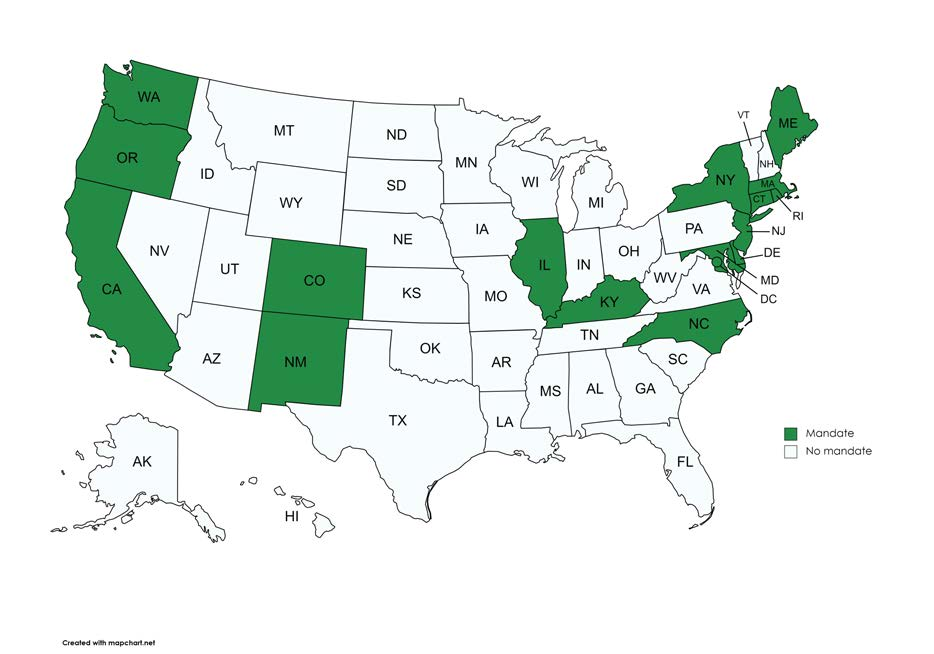

In [30]:
bbc_test = """The BBC was established under a royal charter,[8] and operates under an agreement with the Secretary of State for Culture, Media and Sport.[9] Its work is funded principally by an annual television licence fee[10] which is charged to all British households, companies, and organisations using any type of equipment to receive or record live television broadcasts or to use the BBC's streaming service, iPlayer.[11] The fee is set by the British Government, agreed by Parliament,[12] and is used to fund the BBC's radio, TV, and online services covering the nations and regions of the UK. Since 1 April 2014, it has also funded the BBC World Service (launched in 1932 as the BBC Empire Service), which broadcasts in 28 languages and provides comprehensive TV, radio, and online services in Arabic and Persian. Some of the BBC's revenue comes from its commercial subsidiary BBC Studios (formerly BBC Worldwide), which sells BBC programmes and services internationally and also distributes the BBC's international 24-hour English-language news services BBC News, and from BBC.com, provided by BBC Global News Ltd.[13][14] In 2009, the company was awarded the Queen's Award for Enterprise in recognition of its international achievements in business.[15] Since its formation in 1922, the BBC has played a prominent role in British life and culture.[16] It is sometimes informally referred to as the Beeb or Auntie.[17][18] In 1923 it launched Radio Times (subtitled "The official organ of the BBC"), the first broadcast listings magazine; the 1988 Christmas edition sold 11 million copies, the biggest-selling edition of any British magazine in history.[19]

History
For a chronological guide, see Timeline of the BBC.
The birth of British broadcasting, 1920 to 1922
Britain's first live public broadcast was made from the factory of Marconi Company in Chelmsford in June 1920. It was sponsored by the Daily Mail's Alfred Harmsworth, 1st Viscount Northcliffe and featured the famous Australian soprano Dame Nellie Melba. The Melba broadcast caught the people's imagination and marked a turning point in the British public's attitude to radio.[20]: 47  However, this public enthusiasm was not shared in official circles where such broadcasts were held to interfere with important military and civil communications. By late 1920, the pressure from these quarters and uneasiness among the staff of the licensing authority, the General Post Office (GPO), was sufficient to lead to a ban on further Chelmsford broadcasts.[20]: 50 

But by 1922, the GPO had received nearly 100 broadcast licence requests[21]: 110  and moved to rescind its ban in the wake of a petition by 63 wireless societies with over 3,000 members.[20]: 50–97  Anxious to avoid the same chaotic expansion experienced in the United States, the GPO proposed that it would issue a single broadcasting licence to a company jointly owned by a consortium of leading wireless receiver manufacturers, to be known as the British Broadcasting Company Ltd, which was formed on 18 October 1922.[22] John Reith, a Scottish Calvinist, was appointed its general manager in December 1922 a few weeks after the company made its first official broadcast.[21]: 110  L. Stanton Jefferies was its first director of music.[23] The company was to be financed by a royalty on the sale of BBC wireless receiving sets from approved domestic manufacturers.[24] To this day, the BBC aims to follow the Reithian directive to "inform, educate and entertain".[25]

From private company towards public service corporation, 1923 to 1926

The first issue of the Radio Times (28 September 1923)
The financial arrangements soon proved inadequate. Set sales were disappointing as amateurs made their own receivers and listeners bought rival unlicensed sets.[20]: 146  By mid-1923, discussions between the GPO and the BBC had become deadlocked and the Postmaster General commissioned a review of broadcasting by the Sykes Committee.[26] The committee recommended a short-term reorganisation of licence fees with improved enforcement in order to address the BBC's immediate financial distress, and an increased share of the licence revenue split between it and the GPO. This was to be followed by a simple 10 shillings licence fee to fund broadcasts.[26] The BBC's broadcasting monopoly was made explicit for the duration of its current broadcast licence, as was the prohibition on advertising. To avoid competition with newspapers, Fleet Street persuaded the government to ban news bulletins before 7 pm and the BBC was required to source all news from external wire services.[26] The Radio Times, the world's first and longest-running radio and television listings magazine, was launched by Reith in September 1923.[19] The first edition, subtitled "The official organ of the BBC", was priced at tuppence (two pence) on newsstands, and quickly sold out its run of a quarter of a million copies.[27]

Mid-1925 found the future of broadcasting under further consideration, this time by the Crawford committee. By now, the BBC, under Reith's leadership, had forged a consensus favouring a continuation of the unified (monopoly) broadcasting service, but more money was still required to finance rapid expansion. Wireless manufacturers were anxious to exit the loss-making consortium, and Reith was keen that the BBC be seen as a public service rather than a commercial enterprise. The recommendations of the Crawford Committee were published in March the following year and were still under consideration by the GPO when the 1926 United Kingdom general strike broke out in May. The strike temporarily interrupted newspaper production, and with restrictions on news bulletins waived, the BBC suddenly became the primary source of news for the duration of the crisis.[21]: 117 

The crisis placed the BBC in a delicate position. On the one hand Reith was acutely aware that the government might exercise its right to commandeer the BBC at any time as a mouthpiece of the government if the BBC were to step out of line, but on the other he was anxious to maintain public trust by appearing to be acting independently. The government was divided on how to handle the BBC, but ended up trusting Reith, whose opposition to the strike mirrored the PM's own. Although Winston Churchill in particular wanted to commandeer the BBC to use it "to the best possible advantage", Reith wrote that Stanley Baldwin's government wanted to be able to say "that they did not commandeer [the BBC], but they know that they can trust us not to be really impartial".[28] Thus the BBC was granted sufficient leeway to pursue the government's objectives largely in a manner of its own choosing. Supporters of the strike nicknamed the BBC the BFC for British Falsehood Company. Reith personally announced the end of the strike which he marked by reciting from Blake's "Jerusalem" signifying that England had been saved.[29]

While the BBC tends to characterise its coverage of the general strike by emphasising the positive impression created by its balanced coverage of the views of government and strikers, Seaton has characterised the episode as the invention of "modern propaganda in its British form".[21]: 117  Reith argued that trust gained by 'authentic impartial news' could then be used. Impartial news was not necessarily an end in itself.[21]: 118 

The BBC did well out of the crisis, which cemented a national audience for its broadcasting, and it was followed by the Government's acceptance of the recommendation made by the Crawford Committee (1925–26) that the British Broadcasting Company be replaced by a non-commercial, Crown-chartered organisation: the British Broadcasting Corporation.[26]

1927 to 1939

The Radio Times masthead from 25 December 1931, including the BBC motto "Nation shall speak peace unto Nation"

Television pioneer John Logie Baird (seen here in 1917) televised the BBC's first drama, The Man with the Flower in His Mouth, on 14 July 1930, and the first live outside broadcast, The Derby, on 2 June 1931.[30][31]
The British Broadcasting Corporation came into existence on 1 January 1927, and Reith – newly knighted – was appointed its first director general. To represent its purpose and (stated) values, the new corporation adopted the coat of arms, including the motto "Nation shall speak peace unto Nation".[32]

British radio audiences had little choice apart from the upscale programming of the BBC. Reith, an intensely moralistic executive, was in full charge. His goal was to broadcast "All that is best in every department of human knowledge, endeavour and achievement.... The preservation of a high moral tone is obviously of paramount importance."[33] Reith succeeded in building a high wall against an American-style free-for-all in radio in which the goal was to attract the largest audiences and thereby secure the greatest advertising revenue. There was no paid advertising on the BBC; all the revenue came from a tax on receiving sets. Highbrow audiences, however, greatly enjoyed it.[34] At a time when American, Australian and Canadian stations were drawing huge audiences cheering for their local teams with the broadcast of baseball, rugby and hockey, the BBC emphasised service for a national rather than a regional audience. Boat races were well covered along with tennis and horse racing, but the BBC was reluctant to spend its severely limited air time on long football or cricket games, regardless of their popularity.[35]


The BBC's radio studio in Birmingham, from the BBC Hand Book 1928, which described it as "Europe's largest studio"
John Reith and the BBC, with support from the Crown, determined the universal needs of the people of Britain and broadcast content according to these perceived standards.[36] Reith effectively censored anything that he felt would be harmful, directly or indirectly.[37] While recounting his time with the BBC in 1935, Raymond Postgate claims that BBC broadcasters were made to submit a draft of their potential broadcast for approval. It was expected that they tailored their content to accommodate the modest, church-going elderly or a member of the Clergy.[38] Until 1928, entertainers broadcasting on the BBC, both singers and "talkers" were expected to avoid biblical quotations, Clerical impersonations and references, references to drink or Prohibition in the United States, vulgar and doubtful matter and political allusions.[37] The BBC excluded popular foreign music and musicians from its broadcasts, while promoting British alternatives.[39] On 5 March 1928, Stanley Baldwin, the Prime Minister, maintained the censorship of editorial opinions on public policy, but allowed the BBC to address matters of religious, political or industrial controversy.[40] The resulting political "talk series", designed to inform England on political issues, were criticised by members of parliament, including Winston Churchill, David Lloyd George and Sir Austen Chamberlain. Those who opposed these chats claimed that they silence the opinions of those in Parliament who are not nominated by Party Leaders or Party Whips, thus stifling independent, non-official views.[40] In October 1932, the policemen of the Metropolitan Police Federation marched in protest at a proposed pay cut. Fearing dissent within the police force and public support for the movement, the BBC censored its coverage of the events, only broadcasting official statements from the government.[40]

Throughout the 1930s, political broadcasts had been closely monitored by the BBC.[41] In 1935, the BBC censored the broadcasts of Oswald Mosley and Harry Pollitt.[40] Mosley was a leader of the British Union of Fascists, and Pollitt a leader of the Communist Party of Great Britain. They had been contracted to provide a series of five broadcasts on their parties' politics. The BBC, in conjunction with The Foreign Office of Britain, first suspended this series and ultimately cancelled it without the notice of the public.[41][40] Less radical politicians faced similar censorship. In 1938, Winston Churchill proposed a series of talks regarding British domestic and foreign politics and affairs but was similarly censored.[41] The censorship of political discourse by the BBC was a precursor to the total shutdown of political debate that manifested over the BBC's wartime airwaves.[41] The Foreign Office maintained that the public should not be aware of their role in the censorship.[40] From 1935 to 1939, the BBC also attempted to unite the British Empire's radio waves, sending staff to Egypt, Palestine, Newfoundland, Jamaica, India, Canada and South Africa.[42] Reith personally visited South Africa, lobbying for state-run radio programmes which was accepted by South African Parliament in 1936.[42] A similar programme was adopted in Canada. Through collaboration with these state-run broadcasting centres, Reith left a legacy of cultural influence across the empire of Great Britain with his departure from the corporation in 1938.[42]

Experimental television broadcasts were started in 1929, using an electromechanical 30-line system developed by John Logie Baird.[43] Limited regular broadcasts using this system began in 1932, and an expanded service (now named the BBC Television Service) started from Alexandra Palace in November 1936, alternating between an improved Baird mechanical 240-line system and the all-electronic 405-line Marconi-EMI system which had been developed by an EMI research team led by Sir Isaac Shoenberg.[44] The superiority of the electronic system saw the mechanical system dropped early the following year, with the Marconi-EMI system the first fully electronic television system in the world to be used in regular broadcasting.[45]

BBC versus other media

King George V giving the 1934 Royal Christmas message on BBC Radio. The annual message typically reflects on the year's major events.
The success of broadcasting provoked animosities between the BBC and well-established media such as theatres, concert halls and the recording industry. By 1929, the BBC complained that the agents of many comedians refused to sign contracts for broadcasting, because they feared it harmed the artist "by making his material stale" and that it "reduces the value of the artist as a visible music-hall performer". On the other hand, the BBC was "keenly interested" in a cooperation with the recording companies who "in recent years ... have not been slow to make records of singers, orchestras, dance bands, etc. who have already proved their power to achieve popularity by wireless." Radio plays were so popular that the BBC had received 6,000 manuscripts by 1929, most of them written for stage and of little value for broadcasting: "Day in and day out, manuscripts come in, and nearly all go out again through the post, with a note saying 'We regret, etc.'"[46] In the 1930s music broadcasts also enjoyed great popularity, for example the friendly and wide-ranging BBC Theatre Organ broadcasts at St George's Hall, London by Reginald Foort, who held the official role of BBC Staff Theatre Organist from 1936 to 1938.[47]

Second World War

Statue of George Orwell outside Broadcasting House, headquarters of the BBC
Television broadcasting was suspended from 1 September 1939 to 7 June 1946, during the World War II, and it was left to BBC Radio broadcasters such as Reginald Foort to keep the nation's spirits up. The BBC moved most of its radio operations out of London, initially to Bristol, and then to Bedford. Concerts were broadcast from the Bedford Corn Exchange; the Trinity Chapel in St Paul's Church, Bedford was the studio for the daily service from 1941 to 1945, and, in the darkest days of the war in 1941, the Archbishops of Canterbury and York came to St Paul's to broadcast to the UK and the world on the National Day of Prayer. BBC employees during the war included George Orwell who spent two years with the broadcaster.[48]

During his role as prime minister during the war, Winston Churchill delivered 33 major wartime speeches by radio, all of which were carried by the BBC within the UK.[49] On 18 June 1940, French general Charles de Gaulle, in exile in London as the leader of the Free French, made a speech, broadcast by the BBC, urging the French people not to capitulate to the Nazis.[50] In October 1940, Princesses Elizabeth and Margaret made their first radio broadcast for the BBC's Children's Hour, addressing other children who had been evacuated from cities.[51]

In 1938, John Reith and the Government of the United Kingdom, specifically the Ministry of Information which had been set up for WWII, designed a censorship apparatus for the inevitability of war.[52] Due to the BBC's advancements in shortwave radio technology, the corporation could broadcast across the world during the Second World War.[53] Within Europe, the BBC European Service would gather intelligence and information regarding the current events of the war in English.[52][54] Regional BBC workers, based on their regional geo-political climate, would then further censor the material their broadcasts would cover. Nothing was to be added outside the preordained news items.[52][54] For example, the BBC Polish Service was heavily censored due to fears of jeopardising relations with the Soviet Union. Controversial topics, i.e. the contested Polish and Soviet border, the deportation of Polish citizens, the arrests of Polish Home Army members and the Katyn massacre, were not included in Polish broadcasts.[55] American radio broadcasts were broadcast across Europe on BBC channels. This material also passed through the BBC's censorship office, which surveilled and edited American coverage of British affairs.[53] By 1940, across all BBC broadcasts, music by composers from enemy nations was censored. In total, 99 German, 38 Austrian and 38 Italian composers were censored. The BBC argued that like the Italian or German languages, listeners would be irritated by the inclusion of enemy composers.[56] Any potential broadcasters said to have pacifist, communist or fascist ideologies were not allowed on the BBC's airwaves.[57] In 1937, a MI5 security officer was given a permanent office within the organisation. This officer would examine the files of potential political subversives and mark the files of those deemed a security risk to the organisation, blacklisting them. This was often done on spurious grounds; even so, the practice would continue and expand during the years of the Cold War.[58][59]

Later 20th century

Produced between 1934 and 1959, the BBC-Marconi Type A microphone has been described as an iconic symbol of the BBC alongside the channel's most famous emblem, the rotating globe, which was introduced in 1963.[60]
There was a widely reported urban myth that, upon resumption of the BBC television service after the war, announcer Leslie Mitchell started by saying, "As I was saying before we were so rudely interrupted ..." In fact, the first person to appear when transmission resumed was Jasmine Bligh and the words said were "Good afternoon, everybody. How are you? Do you remember me, Jasmine Bligh ... ?"[61] The European Broadcasting Union was formed on 12 February 1950, in Torquay with the BBC among the 23 founding broadcasting organisations.[62]

Competition to the BBC was introduced in 1955, with the commercial and independently operated television network of Independent Television (ITV). However, the BBC monopoly on radio services would persist until 8 October 1973 when under the control of the newly renamed Independent Broadcasting Authority (IBA), the UK's first Independent local radio station, LBC came on-air in the London area. As a result of the Pilkington Committee report of 1962, in which the BBC was praised for the quality and range of its output, and ITV was very heavily criticised for not providing enough quality programming,[63] the decision was taken to award the BBC a second television channel, BBC2, in 1964, renaming the existing service BBC1. BBC2 used the higher resolution 625-line standard which had been standardised across Europe. BBC2 was broadcast in colour from 1 July 1967 and was joined by BBC1 and ITV on 15 November 1969. The 405-line VHF transmissions of BBC1 (and ITV) were continued for compatibility with older television receivers until 1985.


Television Centre at White City, west London, which opened in 1960 and closed in 2013
Starting in 1964, a series of pirate radio stations (starting with Radio Caroline) came on the air and forced the British government finally to regulate radio services to permit nationally based advertising-financed services. In response, the BBC reorganised and renamed their radio channels. On 30 September 1967, the Light Programme was split into Radio 1 offering continuous "Popular" music and Radio 2 more "Easy Listening".[64] The "Third" programme became Radio 3 offering classical music and cultural programming. The Home Service became Radio 4 offering news, and non-musical content such as quiz shows, readings, dramas and plays. As well as the four national channels, a series of local BBC radio stations were established in 1967, including Radio London.[65] In 1969, the BBC Enterprises department was formed to exploit BBC brands and programmes for commercial spin-off products. In 1979, it became a wholly owned limited company, BBC Enterprises Ltd.[66]

In 1974, the BBC's teletext service, Ceefax, was introduced, created initially to provide subtitling, but developed into a news and information service. In 1978, BBC staff went on strike just before the Christmas, thus blocking out the transmission of both channels and amalgamating all four radio stations into one.[67][68] Since the deregulation of the UK television and radio market in the 1980s, the BBC has faced increased competition from the commercial sector (and from the advertiser-funded public service broadcaster Channel 4), especially on satellite television, cable television, and digital television services. In the late 1980s, the BBC began a process of divestment by spinning off and selling parts of its organisation. In 1988, it sold off the Hulton Press Library, a photographic archive which had been acquired from the Picture Post magazine by the BBC in 1957. The archive was sold to Brian Deutsch and is now owned by Getty Images.[69] In 1987, the BBC decided to centralize its operations by the management team with the radio and television divisions joining forces together for the first time, the activities of the news and currents departments and coordinated jointly under the new directorate.[70] During the 1990s, this process continued with the separation of certain operational arms of the corporation into autonomous but wholly owned subsidiaries, with the aim of generating additional revenue for programme-making. BBC Enterprises was reorganised and relaunched in 1995, as BBC Worldwide Ltd.[66] In 1998, BBC studios, outside broadcasts, post production, design, costumes and wigs were spun off into BBC Resources Ltd.[71]

The BBC Research & Development has played a major part in the development of broadcasting and recording techniques. The BBC was also responsible for the development of the NICAM stereo standard. In recent decades, a number of additional channels and radio stations have been launched: Radio 5 was launched in 1990, as a sports and educational station, but was replaced in 1994, with BBC Radio 5 Live to become a live radio station, following the success of the Radio 4 service to cover the 1991 Gulf War. The new station would be a news and sport station. In 1997, BBC News 24, a rolling news channel, launched on digital television services, and the following year, BBC Choice was launched as the third general entertainment channel from the BBC. The BBC also purchased The Parliamentary Channel, which was renamed BBC Parliament. In 1999, BBC Knowledge launched as a multimedia channel, with services available on the newly launched BBC Text digital teletext service (later rebranded as BBC Red Button), and on BBC Online. The channel had an educational aim, which was modified later on in its life to offer documentaries.

2000 to 2011
In 2002, several television and radio channels were reorganised. BBC Knowledge was replaced by BBC Four and became the BBC's arts and documentaries channel. CBBC, which had been a programming strand as Children's BBC since 1985, was split into CBBC and CBeebies, for younger children, with both new services getting a digital channel: the CBBC Channel and CBeebies Channel.[72] In addition to the television channels, new digital radio stations were created: 1Xtra, 6 Music and Radio 4 Extra. BBC 1Xtra was a sister station to Radio 1 and specialised in modern black music, BBC 6 Music specialised in alternative music genres and BBC7 specialised in archive, speech and children's programming.[73]


England fans in Manchester during a 2006 FIFA World Cup game shown on the BBC Big Screen
The following few years resulted in repositioning of some channels to conform to a larger brand: in 2003, BBC Choice was replaced by BBC Three, with programming for younger adults and shocking real-life documentaries, BBC News 24 became the BBC News Channel in 2008, and BBC Radio 7 became BBC Radio 4 Extra in 2011, with new programmes to supplement those broadcast on Radio 4. In 2008, another channel was launched, BBC Alba, a Scottish Gaelic service.

During this decade, the corporation began to sell off a number of its operational divisions to private owners; BBC Broadcast was spun off as a separate company in 2002,[74] and in 2005, it was sold off to Australian-based Macquarie Capital Alliance Group and Macquarie Group Limited and rebranded Red Bee Media.[75] The BBC's IT, telephony and broadcast technology were brought together as BBC Technology Ltd in 2001,[74] and the division was later sold to the German company Siemens IT Solutions and Services (SIS).[76] SIS was subsequently acquired from Siemens by the French company Atos.[77] Further divestments included BBC Books (sold to Random House in 2006);[78] BBC Outside Broadcasts Ltd (sold in 2008 to Satellite Information Services);[79] Costumes and Wigs (stock sold in 2008 to Angels Costumes);[80] and BBC Magazines (sold to Immediate Media Company in 2011).[81] After the sales of OBs and costumes, the remainder of BBC Resources was reorganised as BBC Studios and Post Production, which continues today as a wholly owned subsidiary of the BBC.

The 2004 Hutton Inquiry and the subsequent report raised questions about the BBC's journalistic standards and its impartiality. This led to resignations of senior management members at the time including the then Director General, Greg Dyke. In January 2007, the BBC released minutes of the board meeting which led to Greg Dyke's resignation.[82]

Unlike the other departments of the BBC, the BBC World Service was funded by the Foreign, Commonwealth and Development Office. The Foreign and Commonwealth Office, more commonly known as the Foreign Office or the FCO, is the British government department responsible for promoting the interests of the United Kingdom abroad.


BBC Pacific Quay in Glasgow, which was opened in 2007
A strike in 2005 by more than 11,000 BBC workers, over a proposal to cut 4,000 jobs, and to privatise parts of the BBC, disrupted much of the BBC's regular programming.[83][84]

In 2006, BBC HD launched as an experimental service and became official in December 2007. The channel broadcast HD simulcasts of programmes on BBC One, BBC Two, BBC Three and BBC Four as well as repeats of some older programmes in HD. In 2010, an HD simulcast of BBC One launched: BBC One HD. The channel uses HD versions of BBC One's schedule and uses upscaled versions of programmes not currently produced in HD. The BBC HD channel closed in March 2013 and was replaced by BBC Two HD in the same month.'
"""

bbc_test = preprocess(bbc_test)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")


In [31]:
len(tokenizer.tokenize(bbc_test)) # 5745 tokens

5745

In [61]:
chunker = SentenceChunker(
    tokenizer=tokenizer
    , chunk_size=256
    , chunk_overlap=64
    , min_sentences_per_chunk=1
)
# Need to play around with these settings to see what the appropriate chunk is
# Chunking too large would reduce accuracy, but chunking too small would generate too many vectors to search
# Also need to experiment with overlap

In [59]:
chunks = chunker.chunk(bbc_test)
print(chunks[0])
print(chunks[1])

The BBC was established under a royal charter,[8] and operates under an agreement with the Secretary of State for Culture, Media and Sport.
[9] Its work is funded principally by an annual television licence fee[10] which is charged to all British households, companies, and organisations using any type of equipment to receive or record live television broadcasts or to use the BBC's streaming service, iPlayer.


In [53]:
# test opening the PDF and chunking it
paper = prepare_PDF(test_file)

In [62]:
chunks = chunker.chunk(paper)
len(chunks)

195

In [18]:
# Current encoding model implementation: static-retrieval-mrl-en-v1
# https://huggingface.co/sentence-transformers/static-retrieval-mrl-en-v1
# Model defaults to 1024 dense dimensions, but can be truncated to save space/time

truncated_dimensions = 256

model = SentenceTransformer(
    "sentence-transformers/static-retrieval-mrl-en-v1"
    , device="cpu"
    , truncate_dim=truncated_dimensions
    )


In [ ]:

len(bbc_test) # 27889
model.encode(bbc_test) # essentially instantaneous

In [26]:
bbc_test

'The BBC was established under a royal charter,[8] and operates under an agreement with the Secretary of State for Culture, Media and Sport.[9] Its work is funded principally by an annual television licence fee[10] which is charged to all British households, companies, and organisations using any type of equipment to receive or record live television broadcasts or to use the BBC\'s streaming service, iPlayer.[11] The fee is set by the British Government, agreed by Parliament,[12] and is used to fund the BBC\'s radio, TV, and online services covering the nations and regions of the UK. Since 1 April 2014, it has also funded the BBC World Service (launched in 1932 as the BBC Empire Service), which broadcasts in 28 languages and provides comprehensive TV, radio, and online services in Arabic and Persian. Some of the BBC\'s revenue comes from its commercial subsidiary BBC Studios (formerly BBC Worldwide), which sells BBC programmes and services internationally and also distributes the BBC\'